# Course of Multiagent Systems for smart machining: Second Assignment

Student: Daniele Trisotto

Email: daniele.trisotto@studenti.unitn.it or daniele.trisotto@eciu.eu

University of Trento 

## Assignment: 
- Open data from last week: 
    - Each student will analyze one operation
    - Compare power of operations: 
    - Average per revolution: 
    - Min/Max per revolution: 
    - Profile of the power curve per revolution(during cutting)
    - Energy in one revolution: 
        - Energy is the integral of the power.

## Brief Summary of Data Processing Steps


My task is to analyze the pocket formation step so this notebook is focused on it. 

## Importing Data

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# File data CSV
filedataC = 'Dati/Session5A1B.csv'                   #cut
filedataNC= 'Dati/Session5A1A.csv'                   #nocut

# Reading csv
dfC = pd.read_csv(filedataC, skiprows=10)
#dfC = dfC.iloc[:, :-1]
dfC = dfC.apply(pd.to_numeric, errors='coerce')
dfC = dfC.dropna()
dfNC = pd.read_csv(filedataNC, skiprows=10)
#dfNC = dfNC.iloc[:, :-1]
dfNC = dfNC.apply(pd.to_numeric, errors='coerce')
dfNC = dfNC.dropna()


In [35]:
dfC.columns = ['time', 
               'prog_pos_x', 
               'meas_pos_x', 
               'power', 
               'prog_pos_y', 
               'meas_pos_y',
               'prog_pos_z', 
               'meas_pos_z']

dfNC.columns = ['time', 
               'prog_pos_x', 
               'meas_pos_x', 
               'power', 
               'prog_pos_y', 
               'meas_pos_y',
               'prog_pos_z', 
               'meas_pos_z']

## Power visualization

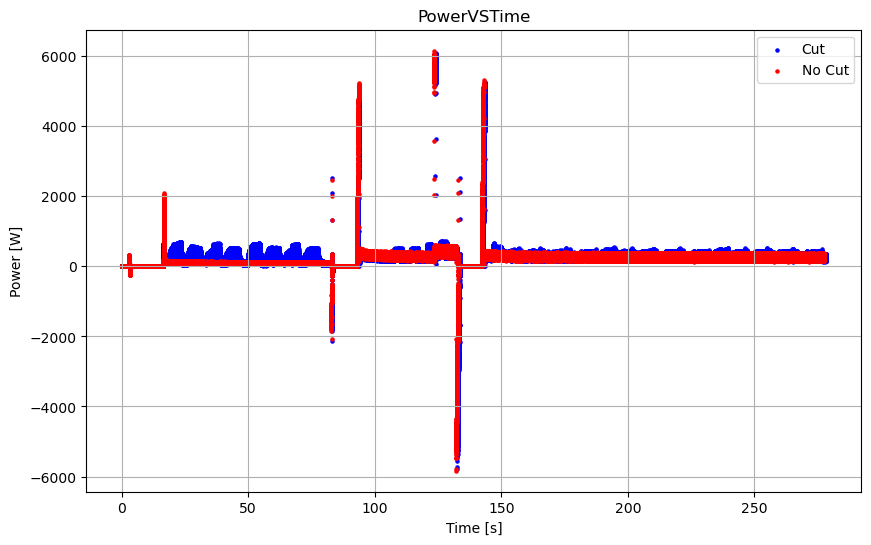

In [36]:
plt.figure(figsize=(10,6))

# dfC
plt.scatter(dfC['time'], dfC['power'], label='Cut', color='blue', s=5) # s=20 dimensione punti

# dfNC
plt.scatter(dfNC['time'], dfNC['power'], label='No Cut', color='red', s=5)

# Labels
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('PowerVSTime')
plt.legend()
plt.grid(True)

plt.show()


## Position Visualization of the full process: 

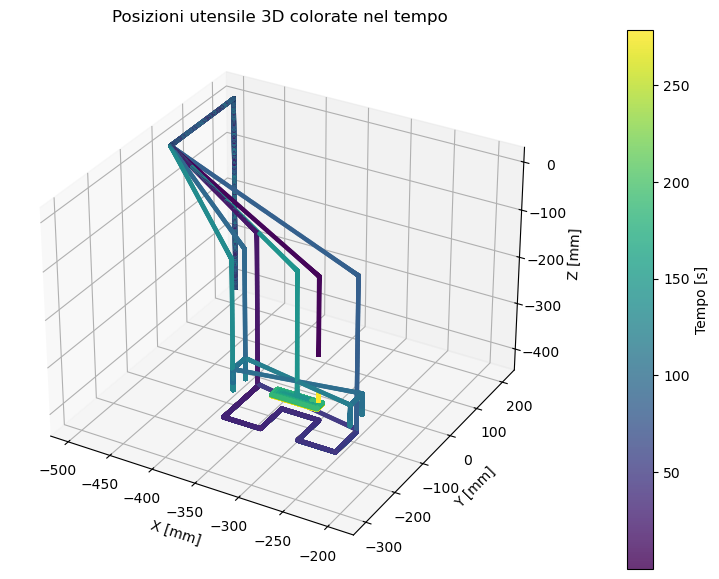

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Scegli il DataFrame
df = dfC  # oppure dfNC

# Crea figura e asse 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D con colore direttamente dal tempo
sc = ax.scatter(df['meas_pos_x'], df['meas_pos_y'], df['meas_pos_z'], 
                c=df['time'], cmap='viridis', s=5, alpha=0.8)

# Etichette assi
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title('Posizioni utensile 3D colorate nel tempo')

# Barra colore per il tempo
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Tempo [s]')

plt.show()

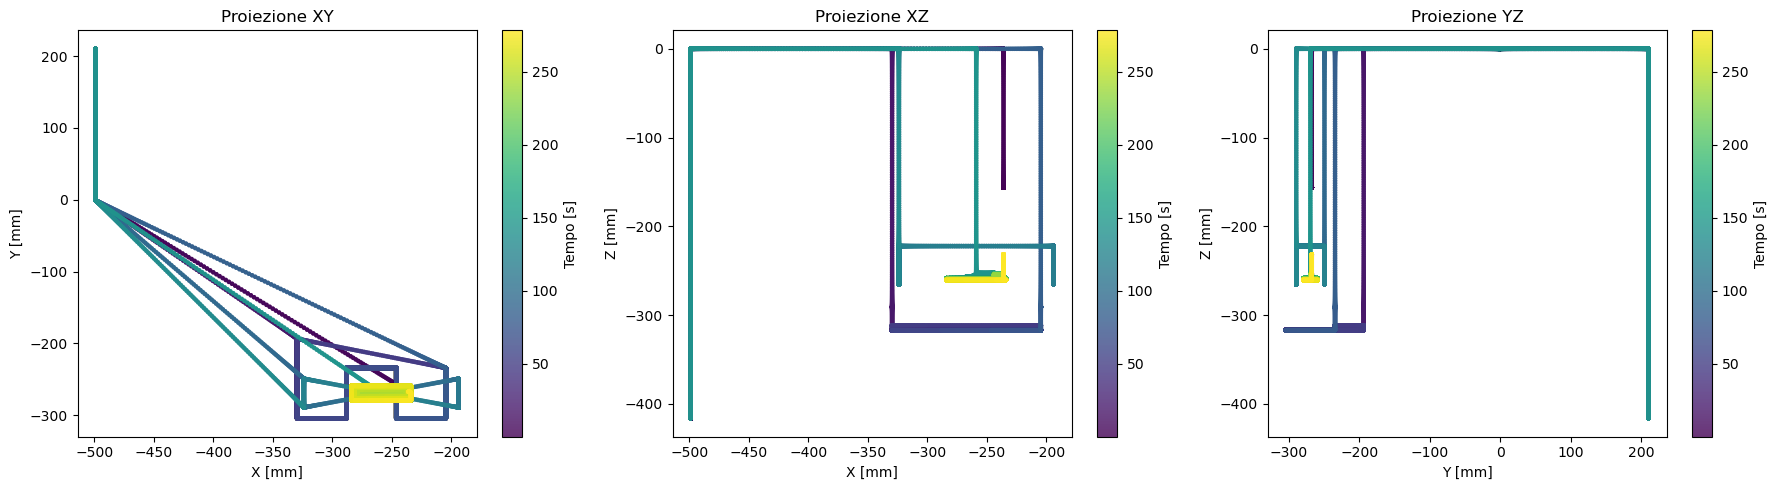

In [38]:
# choose DataFrame
df = dfC  # oppure dfNC

# Imposta figure e dimensioni
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Proiezione XY
sc1 = axes[0].scatter(df['meas_pos_x'], df['meas_pos_y'], c=df['time'], cmap='viridis', s=5, alpha=0.8)
axes[0].set_xlabel('X [mm]')
axes[0].set_ylabel('Y [mm]')
axes[0].set_title('Proiezione XY')
cbar1 = plt.colorbar(sc1, ax=axes[0])
cbar1.set_label('Tempo [s]')

# 2️⃣ Proiezione XZ
sc2 = axes[1].scatter(df['meas_pos_x'], df['meas_pos_z'], c=df['time'], cmap='viridis', s=5, alpha=0.8)
axes[1].set_xlabel('X [mm]')
axes[1].set_ylabel('Z [mm]')
axes[1].set_title('Proiezione XZ')
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label('Tempo [s]')

# 3️⃣ Proiezione YZ
sc3 = axes[2].scatter(df['meas_pos_y'], df['meas_pos_z'], c=df['time'], cmap='viridis', s=5, alpha=0.8)
axes[2].set_xlabel('Y [mm]')
axes[2].set_ylabel('Z [mm]')
axes[2].set_title('Proiezione YZ')
cbar3 = plt.colorbar(sc3, ax=axes[2])
cbar3.set_label('Tempo [s]')

plt.tight_layout()
plt.show()


From this plot it is clear that the pocket formation is the last operation

## Position Visualization of the Pocket formation

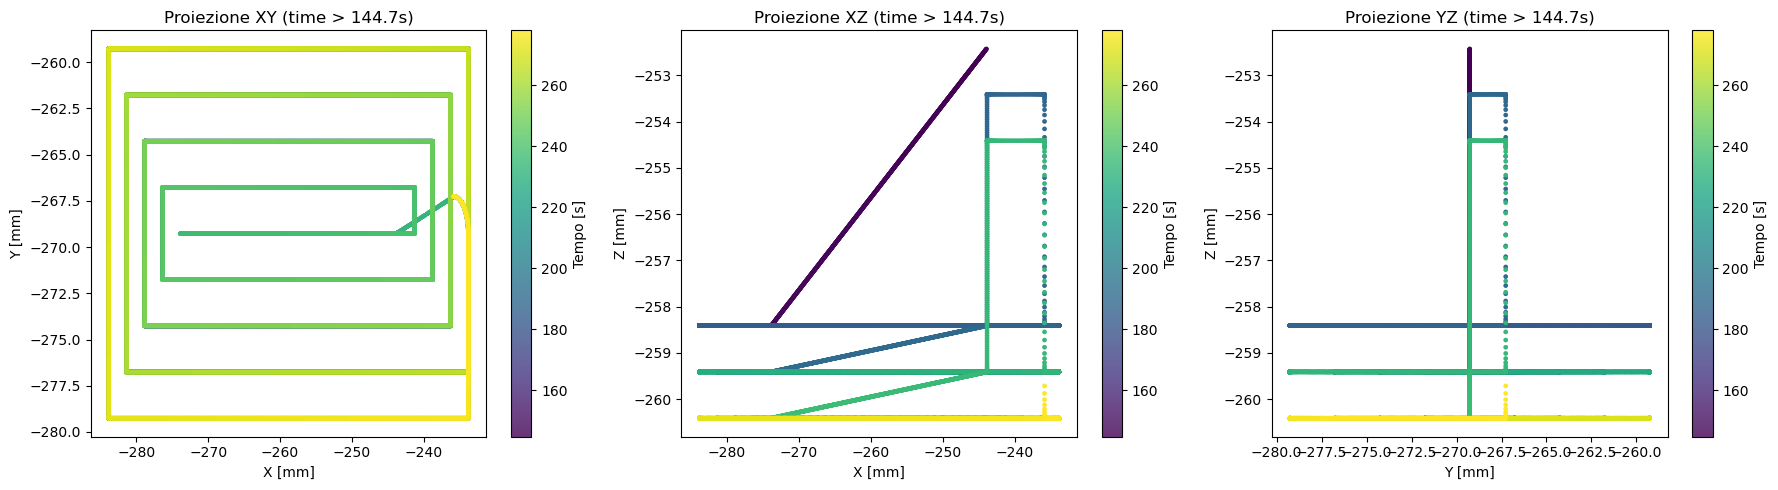

In [39]:
# Scegli DataFrame
df = dfC  # oppure dfNC

# Soglia temporale
t_soglia = 144.7 # ad esempio 50 secondi
t_soglia2 = 278.1
df_filtered = df[(df['time'] > t_soglia) & (df['time'] < t_soglia2) ]

# Imposta figure e dimensioni
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1️⃣ Proiezione XY
sc1 = axes[0].scatter(df_filtered['meas_pos_x'], df_filtered['meas_pos_y'], 
                      c=df_filtered['time'], cmap='viridis', s=5, alpha=0.8)
axes[0].set_xlabel('X [mm]')
axes[0].set_ylabel('Y [mm]')
axes[0].set_title(f'Proiezione XY (time > {t_soglia}s)')
cbar1 = plt.colorbar(sc1, ax=axes[0])
cbar1.set_label('Tempo [s]')

# 2️⃣ Proiezione XZ
sc2 = axes[1].scatter(df_filtered['meas_pos_x'], df_filtered['meas_pos_z'], 
                      c=df_filtered['time'], cmap='viridis', s=5, alpha=0.8)
axes[1].set_xlabel('X [mm]')
axes[1].set_ylabel('Z [mm]')
axes[1].set_title(f'Proiezione XZ (time > {t_soglia}s)')
cbar2 = plt.colorbar(sc2, ax=axes[1])
cbar2.set_label('Tempo [s]')

# 3️⃣ Proiezione YZ
sc3 = axes[2].scatter(df_filtered['meas_pos_y'], df_filtered['meas_pos_z'], 
                      c=df_filtered['time'], cmap='viridis', s=5, alpha=0.8)
axes[2].set_xlabel('Y [mm]')
axes[2].set_ylabel('Z [mm]')
axes[2].set_title(f'Proiezione YZ (time > {t_soglia}s)')
cbar3 = plt.colorbar(sc3, ax=axes[2])
cbar3.set_label('Tempo [s]')

plt.tight_layout()
plt.show()


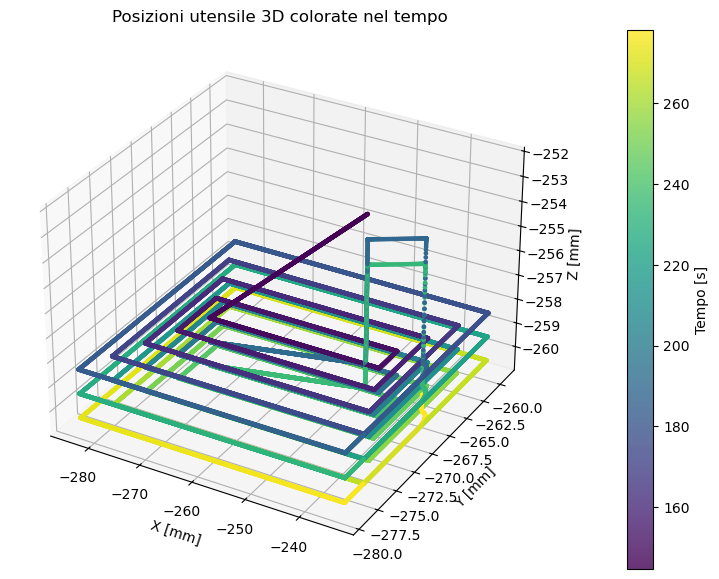

In [40]:
# Scegli DataFrame
df = dfC  # oppure dfNC

# Soglia temporale
t_soglia = 144.7 # ad esempio 50 secondi
t_soglia2 = 278.1
df = df[(df['time'] > t_soglia) & (df['time'] < t_soglia2) ]

# Crea figura e asse 3D
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

# Scatter 3D con colore direttamente dal tempo
sc = ax.scatter(df['meas_pos_x'], df['meas_pos_y'], df['meas_pos_z'], 
                c=df['time'], cmap='viridis', s=5, alpha=0.8)

# Etichette assi
ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title('Posizioni utensile 3D colorate nel tempo')

# Barra colore per il tempo
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Tempo [s]')

plt.show()

## Power of the pocket formation task: 

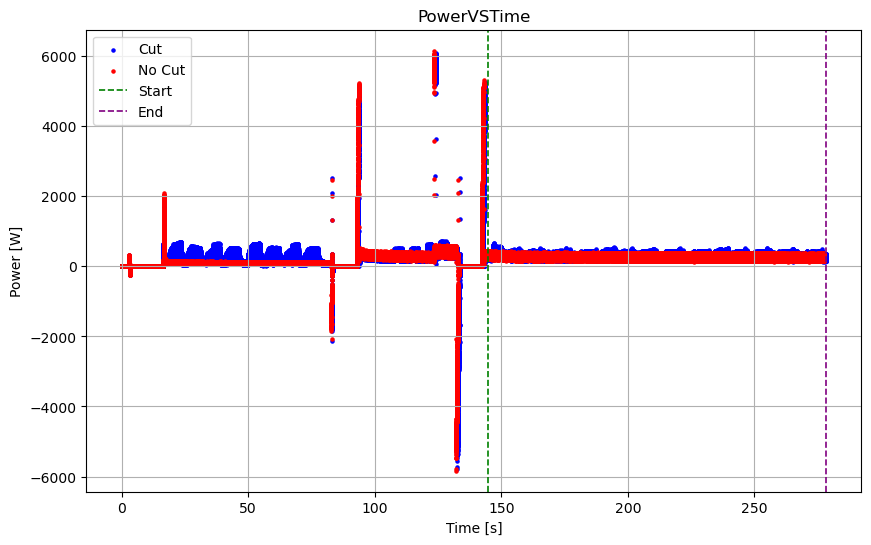

In [41]:
plt.figure(figsize=(10,6))

# dfC
plt.scatter(dfC['time'], dfC['power'], label='Cut', color='blue', s=5)

# dfNC
plt.scatter(dfNC['time'], dfNC['power'], label='No Cut', color='red', s=5)

# Linee verticali
plt.axvline(x=144.7, color='green', linestyle='--', linewidth=1.2, label='Start')
plt.axvline(x=278.1, color='purple', linestyle='--', linewidth=1.2, label='End')

# Labels
plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('PowerVSTime')
plt.legend()
plt.grid(True)

plt.show()


In [42]:
t_min = 144.7
t_max = 278.1

# Filtra dfC
dfC = dfC[(dfC['time'] >= t_min) & (dfC['time'] <= t_max)].copy()

# Filtra dfNC
dfNC = dfNC[(dfNC['time'] >= t_min) & (dfNC['time'] <= t_max)].copy()


## Power difference: 

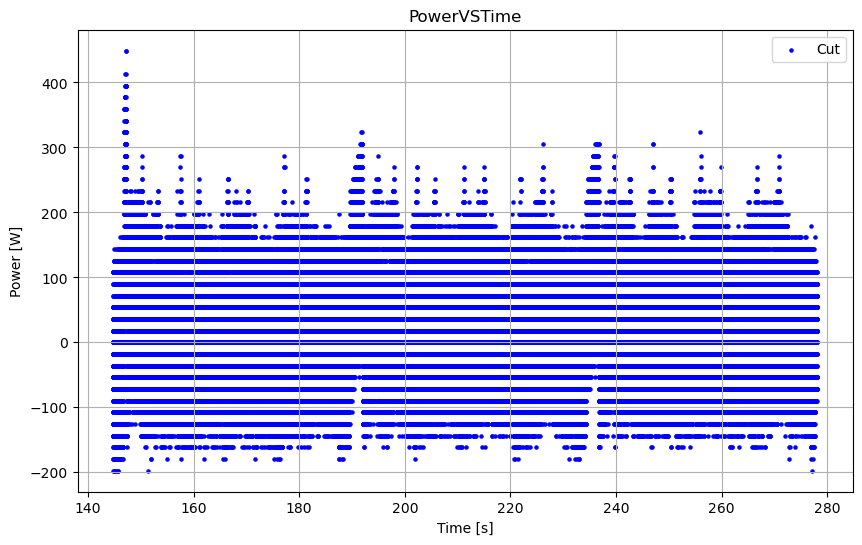

In [43]:
# Unisci tramite merge_asof (accoppiamento per tempo più vicino)
df_merged = pd.merge_asof(
    dfC.sort_values('time'),
    dfNC.sort_values('time'),
    on='time',
    suffixes=('_C', '_NC')
)

# Calcola differenza
df_diff = pd.DataFrame({
    'time': df_merged['time'],
    'power_diff': df_merged['power_C'] - df_merged['power_NC']
})

plt.figure(figsize=(10,6))

plt.scatter(df_diff['time'], df_diff['power_diff'], label='Cut', color='blue', s=5)

plt.xlabel('Time [s]')
plt.ylabel('Power [W]')
plt.title('PowerVSTime')
plt.legend()
plt.grid(True)

plt.show()

From the previous plot we notice that often the cutting power is negative. This is not possible and probably comes out from a data inconsistency. So from now on we consider only total power not cutting power

## Machining Parameters: 


Here I report the full programming code: 

NOTE: I have never learned about CNC programming and in any video of this course isn't explained CNC programming su I interpreted commands through an IA. 

`E_HEAD(272113663,0,0,0,170,-70,-15,71,17,5,25,0,1,20,,4,7,6,100,1,0,33279);*RO*
$AN_SLTRACE=1
E_MI_PL("FR_SURF_D63_ALU","FORET5.5_CARB_FSI",1,0.1,2,400,2,13,0,90,-1,90,0.5,0,0,90,0,90,170,90,-70,90,70,1,0);*RO*
E_DR_PEC(1,0,0,"FORET5.5_CARB_FSI","FR2T D10 ALU FSI",1,0.08,3,80,2,40,-1.5,90,1.5,90,0,0.6,1,1.4,1.6,90);*RO*
_E_P001: E_PS_SEQ(1,0,0,0,90,20,90,-15,90,20,90,-55,90,150,90,-15,90,150,90,-55,90,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,0);*RO*
E_DR_PEC(1,0,0,"FORET5.5_CARB_FSI","",1,0.08,3,80,2,40,-18,90,14,90,4,0.6,1,1.4,1.6,90);*RO*
_E_P002: E_PS_SEQ(1,0,0,0,90,,0,,0,,0,,0,150,90,-15,90,150,90,-55,90,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,0);*RO*
E_DR_PEC(1,0,0,"FORET5.5_CARB_FSI","",1,0.16,3,80,2,40,-18,90,14,90,4,0.6,1,1.4,1.6,90);*RO*
_E_P003: E_PS_SEQ(1,0,0,0,90,20,90,-15,90,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,0);*RO*
E_DR_PEC(1,0,0,"FORET5.5_CARB_FSI","",1,0.08,3,100,2,40,-18,90,14,90,4,0.6,1,1.4,1.6,90);*RO*
_E_P004: E_PS_SEQ(1,0,0,0,90,,0,,0,20,90,-55,90,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,,0,0);*RO*`
`

From now on it should be pocket formation:
- two cutting edges
- diam = 10 

`
E_PO_REC(4,0,0,"FR2T D10 ALU FSI","",1,0.05,2,150,2,1,15,3,0,-1,90,3,91,1,0,85,90,-35,90,60,30,5,0,0,0,8,3,15,3,0,0,1,2,91);*RO*
$AN_SLTRACE=0
E_END(0,1,0);*RO*
M30 ;#SM;*RO*
`

Then the guy how send me data from INSA said that :

- depth of pass = 1 mm
- cutting speed = 150 m/min
- feed per tooth = 0.05 mm/tour

In [44]:
D=10
depth=1
Vc=150
feed=0.05
N = Vc/(np.pi * D) * 1000

# Revolution counter (just in the surfacing interval!)
Trev = 60/N # (s) revolution period

dfC['rev'] = ((dfC['time'] - dfC['time'].iloc[0])/Trev).astype(int)
dfC.insert(0, 'rev', dfC.pop('rev'))

stats = dfC.groupby('rev')['power'].agg(
    mean_power='mean',
    min_power='min',
    max_power='max'
).reset_index()

pd.set_option('display.precision', 2)

stats.head(12).style.format("{:.2f}").set_caption("First 12 revolutions")

,rev,mean_power,min_power,max_power
0,0.00,310.32,233.38,377.00
1,1.00,302.19,197.47,412.90
2,2.00,290.23,215.43,359.04
3,3.00,312.88,215.43,377.00
4,4.00,296.21,197.47,359.04
5,5.00,302.19,197.47,394.95
6,6.00,302.19,215.43,377.00
7,7.00,300.06,215.43,359.04
8,8.00,299.20,197.47,394.95
9,9.00,293.22,179.52,359.04


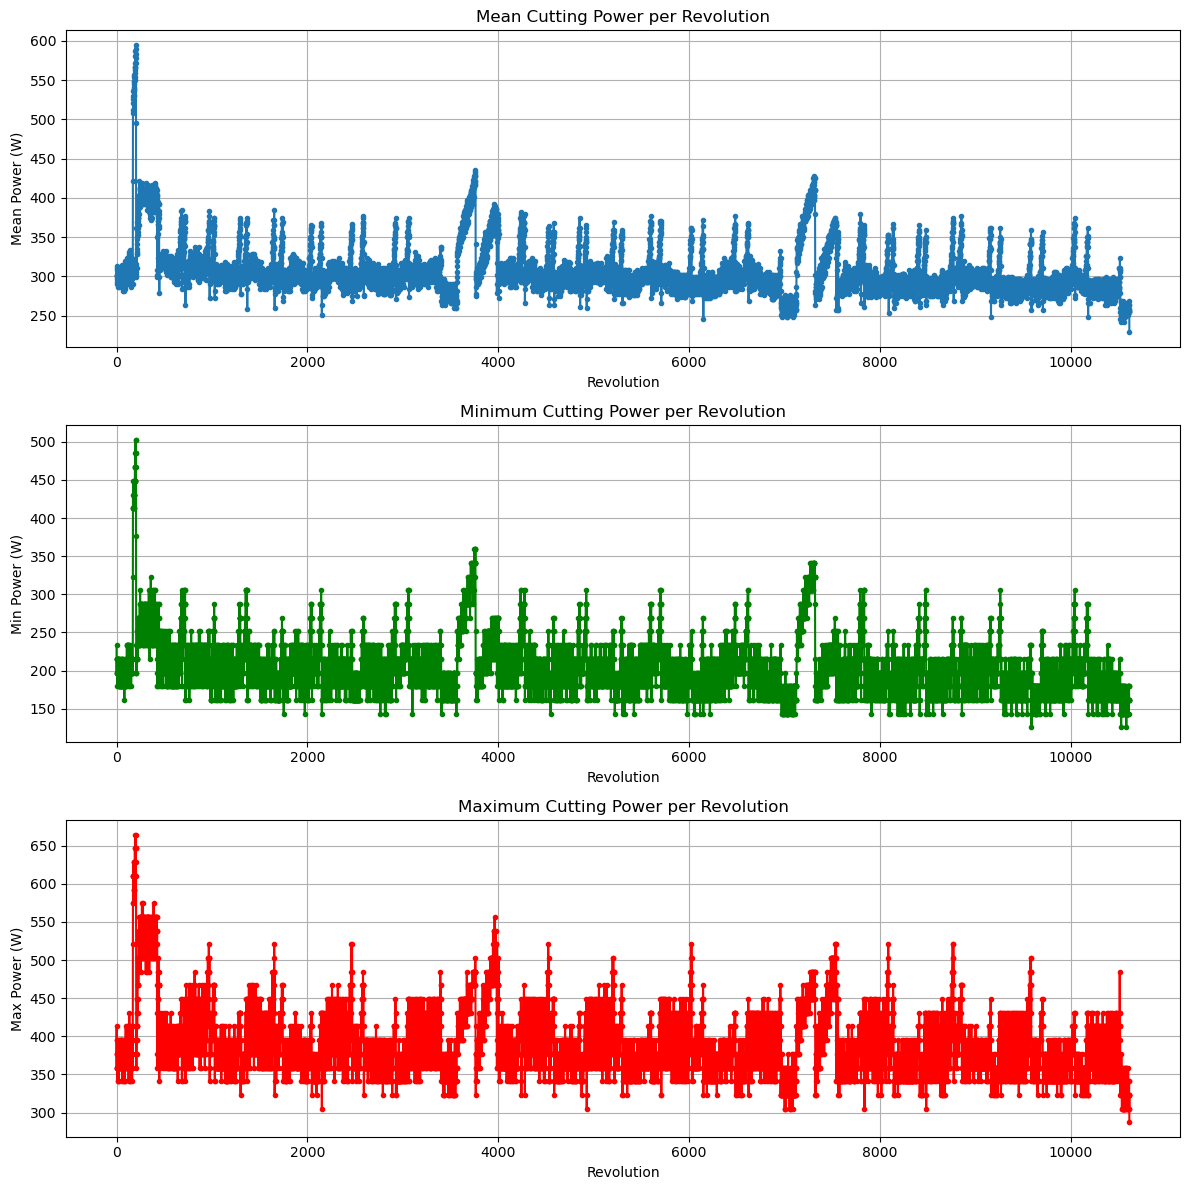

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
fig.subplots_adjust(hspace=0.4)

axes[0].plot(stats['rev'], stats['mean_power'], marker='.')
axes[0].set_xlabel('Revolution')
axes[0].set_ylabel('Mean Power (W)')
axes[0].set_title('Mean Cutting Power per Revolution')
axes[0].grid(True)

axes[1].plot(stats['rev'], stats['min_power'], marker='.', color='green')
axes[1].set_xlabel('Revolution')
axes[1].set_ylabel('Min Power (W)')
axes[1].set_title('Minimum Cutting Power per Revolution')
axes[1].grid(True)

axes[2].plot(stats['rev'], stats['max_power'], marker='.', color='red')
axes[2].set_xlabel('Revolution')
axes[2].set_ylabel('Max Power (W)')
axes[2].set_title('Maximum Cutting Power per Revolution')
axes[2].grid(True)

plt.tight_layout()
plt.show()

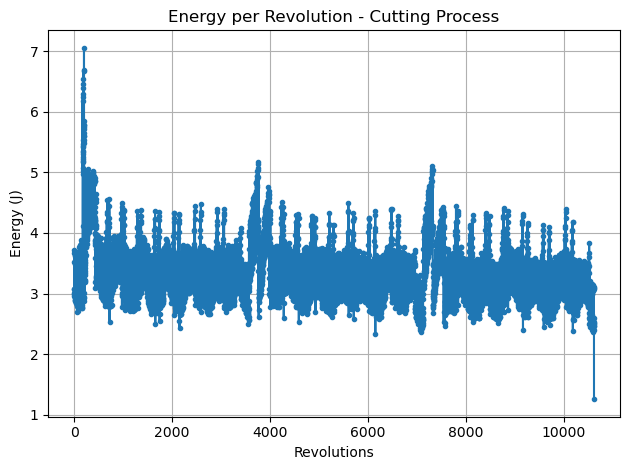

In [46]:
energy_per_rev = []

for rev_id, group in dfC.groupby('rev'):
    t = group['time'].values
    p = group['power'].values
    
    dt = t[1:] - t[:-1]                  # Δt_j
    p_avg = (p[1:] + p[:-1]) / 2         # (P_j + P_{j+1})/2b 
    
    E = (p_avg * dt).sum()
    
    energy_per_rev.append([rev_id, E])

energy_per_rev = pd.DataFrame(energy_per_rev, columns=['rev', 'energy'])
plt.plot(energy_per_rev['rev'], energy_per_rev['energy'], marker='.', linestyle='-')
plt.xlabel('Revolutions')
plt.ylabel('Energy (J)')
plt.title('Energy per Revolution - Cutting Process')
plt.grid(True)
plt.tight_layout()
plt.show()